<a href="https://colab.research.google.com/github/Rudrajit12/BigBasket-Product-Assortment-Optimization/blob/main/BigBasket_Product_Assortment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing Product Assortment and Pricing Strategy for BigBasket**

## **📌 Problem Statement**

BigBasket, India’s leading online grocery platform, offers thousands of products spanning multiple categories, subcategories, and brands. However, with a rapidly expanding product catalog, the company faces challenges in maintaining an optimal product assortment, ensuring competitive pricing, and offering a diverse and appealing brand portfolio.

To stay ahead in the competitive online grocery market, BigBasket needs to ensure its offerings are balanced, strategically priced, and tailored to customer preferences. This project aims to analyze the current product lineup using a comprehensive dataset of ~28,000 products to uncover opportunities for category improvement, price optimization, and brand strategy enhancements.

---

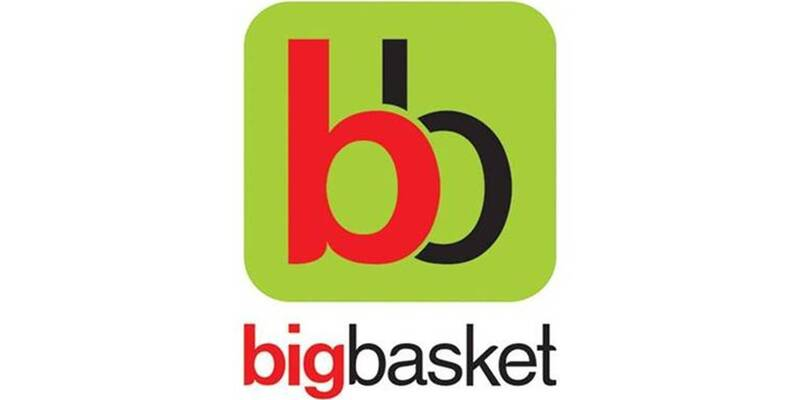

## **🎯 Business Objectives**

This project is designed to support strategic decision-making in the following key areas:

1. Product Assortment Optimization
  - Evaluate the breadth and depth of product coverage across categories and subcategories.

  - Identify underrepresented or overrepresented categories/subcategories.

  - Detect redundant or potentially outdated product entries.

2. Pricing Strategy Analysis
  - Analyze price distributions within and across categories and subcategories.

  - Detect pricing inconsistencies or outliers.

  - Compare price positioning of different brands within the same subcategory.

3. Brand and Category Positioning
  - Assess brand dominance within each category and subcategory.

  - Identify categories with low brand diversity (monopoly risks) or high fragmentation.

  - Surface opportunities for private label development or third-party brand partnerships.

4. Opportunity and Gap Identification
  - Discover product gaps in high-performing categories with limited options.

  - Highlight categories with a wide range of prices, suggesting tiered product strategies.

  - Identify areas for bundling or promotional focus to increase customer value perception.

---

**🎯 Objective 1: Product Assortment Optimization**

✅ KPIs:
- 🧾 Total Number of Unique Products

- 📦 Number of Unique Categories and Subcategories

- 📊 Product Count per Category/Subcategory

- 🔁 Duplicate/Redundant Product Rate

- 📉 Low-Assortment Categories (categories with < X products)

❓ Analytical Questions:
- How many distinct categories and subcategories exist?

- Which categories are overloaded or underrepresented in product variety?

- Are there categories with excessive product duplication or very similar SKUs?

**💸 Objective 2: Pricing Strategy Analysis**

✅ KPIs:
- 💲 Average Price per Category/Subcategory

- 📈 Price Range (Min-Max) per Category

- 🪙 Standard Deviation of Prices per Category (to check volatility)

- 📉 Price Outlier Count (products far from the mean/median)

- 🏷️ Price Tiers Distribution (e.g., % of low/mid/high-priced products)

❓ Analytical Questions:
- Are there pricing inconsistencies within the same subcategory?

- Which categories have the most/least pricing volatility?

- Do similar products from different brands have different prices?

- Are there subcategories where luxury or economy pricing dominates?

**🧼 Objective 3: Brand and Category Positioning**

✅ KPIs:
- 🏭 Number of Unique Brands per Category/Subcategory

- 👑 Top 5 Brands by Product Count in Each Category

- 📊 Brand Share (%) within Subcategories

- 📉 Categories with Brand Monopolies (<2 brands)

❓ Analytical Questions:
- Are certain brands dominating specific categories?

- Which categories have the highest brand diversity?

- Are there categories where BigBasket could launch private-label products due to low brand presence?

**📈 Objective 4: Opportunity and Gap Identification**

✅ KPIs:
- 📉 Categories with Low Product Counts but High Price Averages

- 🕳️ Subcategories with Few Brands and High Prices

- 🧃 Potential Bundling Candidates (products in same subcategory with similar prices)

- 📦 Categories Lacking Tiered Options (no low/mid/high pricing segments)

❓ Analytical Questions:
- Are there gaps in product variety in high-demand categories?

- Can we identify areas where more affordable or premium products could be introduced?

- Are there bundling opportunities based on pricing and subcategory clustering?

---

### 📘 **Step 1: Data Loading**

In this first step, we’ll load the dataset and take an initial look at its structure. We'll use Pandas, a powerful Python library commonly used for data analysis and manipulation.

📌 **Why this step matters:**
Before diving into analysis, it's important to load the dataset into memory so we can explore, clean, and visualize it. It also helps us confirm that the data was read correctly and is structured as expected.

In [1]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the data
bb_df = pd.read_csv('/content/drive/MyDrive/EDA Projects/BigBasket Product Assortment Analysis/BigBasket Products.csv')
bb_df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
# last 5 rows of the data
bb_df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


💬 **What this code does:**

* We import pandas and use the alias pd, which is standard in the Python data community.

* We define the file path and use pd.read_csv() to read the CSV file into a DataFrame (a tabular structure like a spreadsheet).

* df.head() lets us preview the first 5 rows so we can get a feel for what the data looks like.

---

### **📘 Step 2: Data Overview & Basic Info**

**📌 Why this step matters:**

Before we clean, transform, or analyze the data, we need to:

- Understand how much data we have and what type it is

- Identify missing values, inconsistent formats, and potential outliers

- Figure out which columns are important and what needs preprocessing

#### **🧾 2.1 Dataset Dimensions**

In [5]:
# Shape of the dataset
print(f"The dataset contains {bb_df.shape[0]} rows and {bb_df.shape[1]} columns.")

The dataset contains 27555 rows and 10 columns.


🔍 This means we’re analyzing 27,555 grocery products across 10 features, which is a substantial catalog for BigBasket.

#### **🧾 2.2 Column Names and Data Types**

In [6]:
# View column names and data types
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


**🔍 df.info() helps us understand:**

- Which columns are categorical vs numerical

- Where missing data exists

- Data types, which will affect how we clean and analyze each column

**📌 Key Observations:**

✅ Most columns are non-null, but we do see:

  - 1 missing value in product

  - 1 missing value in brand

  - 115 missing values in description

  - 8,626 missing values in rating (~31%)

✅ Data types are appropriate:

  - sale_price, market_price, and rating are floats (numerical)

  - Others are either object (categorical/text) or int64 (for index)

#### **🧾 2.3 Summary Statistics for Numerical Columns**

In [7]:
# Basic statistical summary for numerical features
bb_df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


**🧠 Insights from the Numerical Summary:**

**💸 Prices: sale_price & market_price**
- Average sale price: ₹322.51, market price: ₹382.06

- Median values (50th percentile): ₹190 (sale), ₹220 (market) → skewed right due to high-value outliers

- Min values: ₹2.45 (sale), ₹3.00 (market) → very cheap or small-quantity items

- Max values: ₹12,500 for both → likely bulk products, premium items, or potential data errors

- Standard deviations are high → prices vary widely across products

✅ We’ll later calculate:

- Discount amount = market_price - sale_price

- Discount % = (market_price - sale_price) / market_price

This can help with pricing strategy and promotional effectiveness analysis.

**⭐ Ratings**
- Mean rating: 3.94 out of 5 — indicates generally positive feedback

- Median: 4.1, 75% of products score above 4.3

- Min: 1.0, Max: 5.0

- Standard deviation: ~0.74, suggesting a decent spread in user opinions

- ~8,626 missing values (from Step 2.2) → ~31% of products are unrated

📌 Note: We'll later investigate whether missing ratings correlate with:

- Specific categories or sub-categories

- New/less popular brands or SKUs

**⚠️ Skewed Distributions & Outliers**
- Both sale_price and market_price are heavily right-skewed

- With prices ranging from ₹2.45 to ₹12,500, we’ll need to handle outliers using:

  - Log transformation (for visualization)

  - Segmentation (e.g., low, mid, high-priced product tiers)

- These outliers will strongly influence averages, so medians and percentiles are key for fair comparisons.


#### **🧾 2.4 Checking for Missing Values**

In [8]:
# Total missing values per column
bb_df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


**🔍 Summary:**

- rating has ~31% missing values

- description is missing in 115 products — negligible proportion (~0.4%)

- product and brand each have just 1 missing value

**🔧 Action Plan:**

- rating: Analyze separately → consider imputation, flagging, or exclusion

- description: Optional field, low impact

- product/brand: Drop or fill — depends on row context during cleaning

#### **🧾 2.5 Checking for Duplicate Records**

In [9]:
# Total number of duplicate rows
bb_df.duplicated().sum()

np.int64(0)

✅ No duplicate records found — the dataset is clean in this regard.

---

### **📦 Step 3: Data Cleaning & Preprocessing**

**📌 Why this step matters:**

Before any meaningful analysis, we need to:

  - Fix missing or invalid data

  - Remove or handle duplicates

  - Engineer useful features (e.g., discount percentage)

  - Ensure data types and values are consistent

#### **🧼 3.1 Handling Missing Values**

**🧠 Observations:**

- product: Only 1 missing → we can drop this row

- brand: Also just 1 missing → drop this row too

- rating: 8626 missing (~31% of data) → too many to drop, we’ll retain and analyze separately

- description: 115 missing (~0.4%) → we can either fill with "No description" or drop

In [10]:
# Dropping rows with missing product or brand names
bb_df = bb_df.dropna(subset=['product', 'brand'])

# Filling missing descriptions with a placeholder
bb_df['description'] = bb_df['description'].fillna("No description available")

In [11]:
# check for missing values again
bb_df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,8625
description,0


**🧠 Notes on rating:**

We’ll keep missing ratings as is for now, since:

  - Some products might not have been rated yet (new or low volume).

  - It's still useful to include them in broader category/brand analysis.

#### **🧹 3.2 Dropping the index Column**

**📌 Why we drop it:**

- The index column just reflects the row number — it doesn’t carry any analytical or domain-specific value.

- Pandas already uses a built-in index for row identification, so retaining a duplicate is unnecessary.

In [12]:
# Dropping the 'index' column
bb_df.drop(columns=['index'], inplace=True)

# Confirming the new shape of the dataset
print(f"Updated dataset shape: {bb_df.shape}")

Updated dataset shape: (27553, 9)


#### **🧮 3.3: Feature Engineering and Data Formatting**

**🛠️ 3.3.1: Standardize Column Names**

**📌 Why this matters:**

- Ensures consistency and avoids bugs during coding (e.g., no accidental typos due to case sensitivity or spaces).

- Makes it easier to reference columns programmatically.

In [13]:
# Standardizing all column names to lowercase with underscores
bb_df.columns = bb_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verifying column names
print(bb_df.columns.tolist())

['product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description']


**🛠️ 3.3.2: Convert Data Types if Necessary**

**📌 Why this matters:**

- Ensures that each column has the appropriate data type for analysis.

- For instance, dates should be in datetime format, numeric columns should be float or int, and categories could be converted to the 'category' dtype for efficiency.

In [14]:
# Check current data types again for reference
bb_df.dtypes

,0
product,object
category,object
sub_category,object
brand,object
sale_price,float64
market_price,float64
type,object
rating,float64
description,object


**🔍 From earlier output:**

- category, sub_category, brand, and type are object types (strings).

- These could benefit from being converted to the category type for:

  - Memory optimization (less space used)

  - Faster groupby and filtering operations

- rating, sale_price, and market_price are already float64 — which is appropriate.

In [15]:
# Convert object-type columns that are categorical to 'category' dtype
categorical_cols = ['category', 'sub_category', 'brand', 'type']
bb_df[categorical_cols] = bb_df[categorical_cols].astype('category')

# Confirm the conversion
bb_df.dtypes

,0
product,object
category,category
sub_category,category
brand,category
sale_price,float64
market_price,float64
type,category
rating,float64
description,object


**🛠️ 3.3.3: Creating New Derived Columns**

**📌 Why this matters:**

Sometimes, raw data doesn't contain all the insights directly. Derived features help:

  - Reveal hidden patterns

  - Enable comparative analysis (e.g., discounts, margins)

  - Support KPI tracking and business decision-making

**💡 What we can create:**

1. Discount Amount = Market Price - Sale Price

  → Tells us how much discount is offered.

2. Discount Percentage
  
  → Helps in analyzing promotional pricing strategies across categories/brands.

In [16]:
# Create discount amount column
bb_df['discount_amount'] = bb_df['market_price'] - bb_df['sale_price']

# Create discount percentage column (avoid division by zero)
bb_df['discount_percent'] = ((bb_df['discount_amount'] / bb_df['market_price']) * 100).round(2)

# Handle cases where market_price is 0 (if any)
bb_df['discount_percent'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Preview the new columns
bb_df[['product', 'sale_price', 'market_price', 'discount_amount', 'discount_percent']].head()

,product,sale_price,market_price,discount_amount,discount_percent
0,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.0,0.0,0.00
1,Water Bottle - Orange,180.0,180.0,0.0,0.00
2,"Brass Angle Deep - Plain, No.2",119.0,250.0,131.0,52.40
3,Cereal Flip Lid Container/Storage Jar - Assort...,149.0,176.0,27.0,15.34
4,Creme Soft Soap - For Hands & Body,162.0,162.0,0.0,0.00


**🧠 Key Insights:**

- These derived features will be extremely useful for the Pricing Strategy Analysis objective.

- We’ll be able to:

  - Compare brand-level discounting

  - Identify high-discount categories

  - Explore correlation between discount and rating

**🛠️ 3.3.4: Handling Edge Cases in Prices and Ratings**

**📌 Why this matters:**

Even though we’ve cleaned missing values, we still need to ensure:

- There are no zero or negative prices (unless valid for promotions)

- Unusually high prices or ratings outside 1–5 don’t sneak in

- We don’t include junk or placeholder values in analysis

**🔍 Check for zero or negative prices:**

In [17]:
# Check for products with sale_price <= 0
zero_price_products = bb_df[bb_df['sale_price'] <= 0]
print(f"Products with zero or negative sale price: {len(zero_price_products)}")

# Check for products with market_price <= 0
zero_market_price = bb_df[bb_df['market_price'] <= 0]
print(f"Products with zero or negative market price: {len(zero_market_price)}")

Products with zero or negative sale price: 0
Products with zero or negative market price: 0


**🔍 Check for invalid ratings:**

In [18]:
# Check for ratings outside the range 1 to 5
invalid_ratings = bb_df[(bb_df['rating'] < 1) | (bb_df['rating'] > 5)]
print(f"Products with invalid ratings: {len(invalid_ratings)}")

Products with invalid ratings: 0


**✅ Results from our dataset:**

Since your earlier describe() showed:

- Minimum sale_price = 2.45 (✅ reasonable)

- Minimum market_price = 3.0 (✅ okay)

- Ratings range from 1.0 to 5.0 (✅ valid)

We’re good — no action needed here.

#### **🛠️ 3.4: Encoding Categorical Features**

**📌 Why this step matters:**

Before we perform grouping, aggregation, or modeling, we often:

- Ensure categorical columns are clean, consistent, and usable

- If needed, normalize category labels (e.g., "Snacks" vs "snacks")

- Later, for modeling: encode strings as numbers

**🎯 Target Columns:**

We’re mainly interested in these categorical columns:

- product (string names, won't be encoded but used in analysis)

- category ✅

- sub_category ✅

- brand ✅

- type ✅

**🧼 Step 3.4.1: Normalize Categorical Strings**

Let’s lowercase all text values and remove extra spaces (to avoid duplicates like "Beverages" vs "beverages ").

In [19]:
# Strip whitespaces and lowercase all applicable categorical columns
cat_cols = ['product', 'category', 'sub_category', 'brand', 'type']

for col in cat_cols:
    bb_df[col] = bb_df[col].str.strip().str.lower()

**🔍 Quick check after cleanup:**

In [20]:
# View unique category and type values
print("Unique categories:", bb_df['category'].nunique())
print("Unique subcategories:", bb_df['sub_category'].nunique())
print("Unique brands:", bb_df['brand'].nunique())
print("Unique types:", bb_df['type'].nunique())

Unique categories: 11
Unique subcategories: 90
Unique brands: 2312
Unique types: 426


---

**💭 Should We Cap or Preserve Outliers?**

**📦 Context of the Dataset:**

We're analyzing product listings from BigBasket, and the pricing columns (sale_price and market_price) reflect the diversity of products sold — from basic grocery items to premium goods.

**✅ Reasons to Preserve Outliers:**

📈 Natural Price Variance
- Higher prices could belong to bulk items, premium brands, imported goods, etc. These aren’t errors — they reflect reality.

📊 Strategic Importance
- Outliers might actually highlight interesting insights (e.g., luxury pricing, niche categories).

🧠 Business Use Case
- Since this is an EDA project, not a model, we care more about understanding the distribution, not forcing normalization.

🎯 Price Tier Analysis
- Outliers will help in detecting the spread of pricing tiers (low/mid/high), which is part of our project objectives.

---

### **📘 Step 4: Univariate Analysis**

**📌 Why this step matters:**

Before diving into relationships between features, it’s essential to understand each column individually. This step helps us:

- Understand distributions and spread (for numerical columns)

- Detect skewness, outliers, and dominant values

- See frequency distributions for categorical columns

- Identify potential feature transformations

#### **🧾 4.1 Analyzing sale_price**

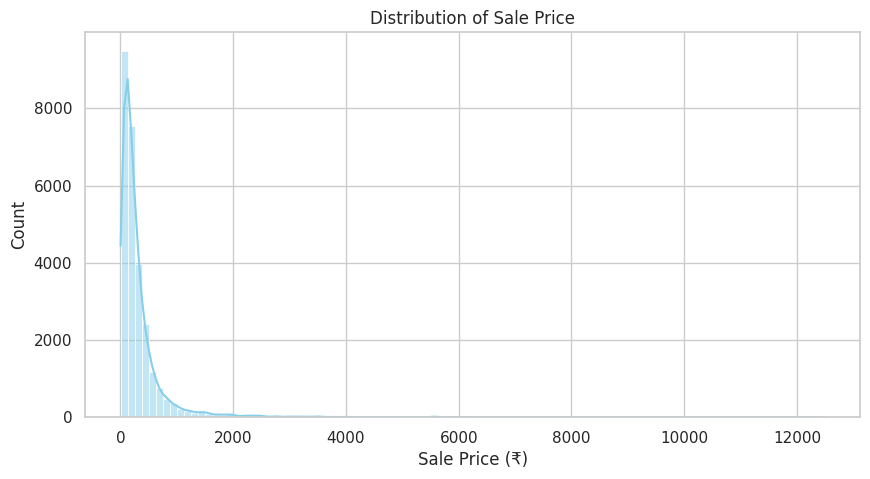

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")

# Plotting distribution of sale_price
plt.figure(figsize=(10, 5))
sns.histplot(bb_df['sale_price'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price (₹)")
plt.ylabel("Count")
plt.show()

**💬 What this code does:**

- We use histplot() from Seaborn to plot the frequency distribution of product sale_price.

- kde=True adds a smooth curve to understand the shape.

- Binning is increased to 100 for better detail across the range.

**📊 Observations:**

- Most products are priced below ₹500, indicating the dominance of low- to mid-priced goods.

- There’s a long right tail, confirming some high-priced premium items (e.g., gourmet, imported, bulk packs).

- Distribution is highly right-skewed — which is expected in consumer pricing datasets.

📌 We'll also try a log transformation to better view the spread:

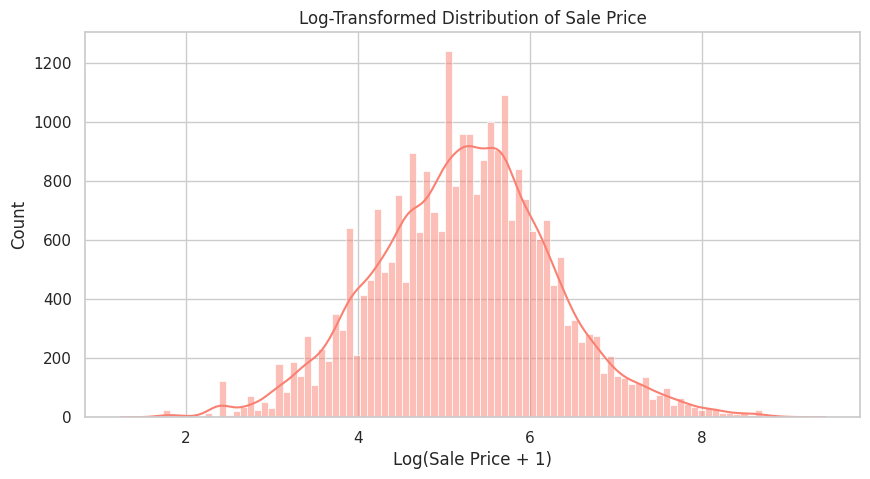

In [22]:
import numpy as np

# Plot log-transformed sale prices
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(bb_df['sale_price']), bins=100, kde=True, color='salmon')
plt.title("Log-Transformed Distribution of Sale Price")
plt.xlabel("Log(Sale Price + 1)")
plt.ylabel("Count")
plt.show()

🔍 This transformation flattens the skew, helping us compare product prices across all ranges more easily later on.

#### **🧾 4.2 Analyzing market_price**

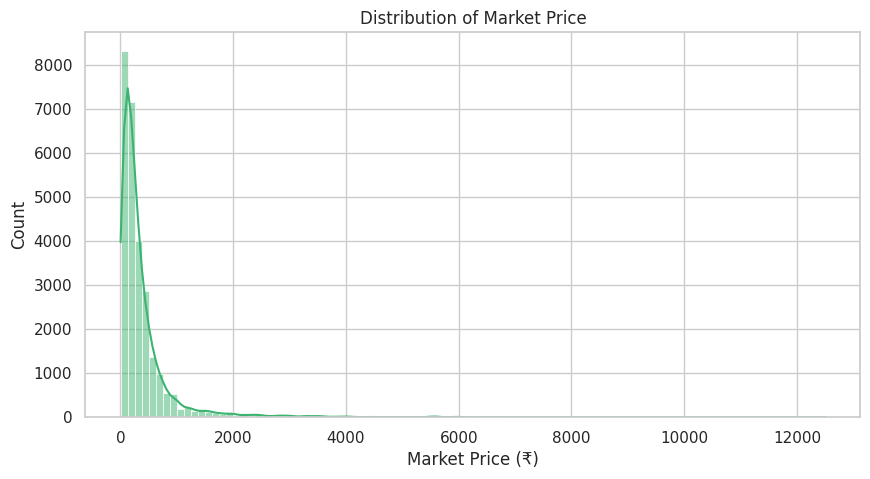

In [23]:
# Distribution of market_price
plt.figure(figsize=(10, 5))
sns.histplot(bb_df['market_price'], bins=100, kde=True, color='mediumseagreen')
plt.title("Distribution of Market Price")
plt.xlabel("Market Price (₹)")
plt.ylabel("Count")
plt.show()

**📊 Observations:**

- Similar to sale_price, most products have a market price below ₹500, with heavy concentration in the lower range.

- The distribution is right-skewed, indicating a handful of premium/high-MRP items.

- Outliers exist (up to ₹12,500), but they may be valid (e.g., bulk grocery items, high-end oils, dry fruits, or imported goods).

📌 Let’s apply a log transformation again to get a normalized view:

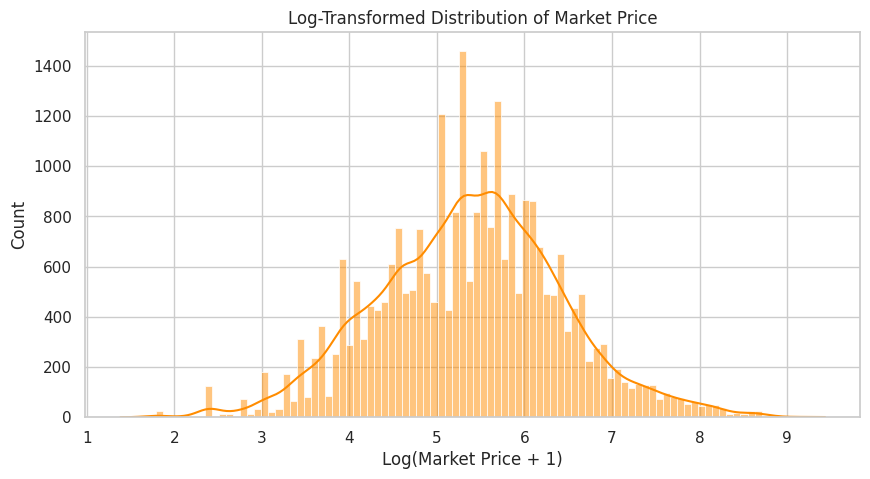

In [24]:
# Log-transformed view of market_price
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(bb_df['market_price']), bins=100, kde=True, color='darkorange')
plt.title("Log-Transformed Distribution of Market Price")
plt.xlabel("Log(Market Price + 1)")
plt.ylabel("Count")
plt.show()

**🔍 Insights from Log View:**

- The log-transformed plot gives us a more symmetric shape, useful for comparing prices across brands or subcategories later.

- It confirms that a majority of items cluster in the ₹50–₹500 market price range, with a gradual drop-off toward higher values.

#### **🧾 4.3 Analyzing rating**

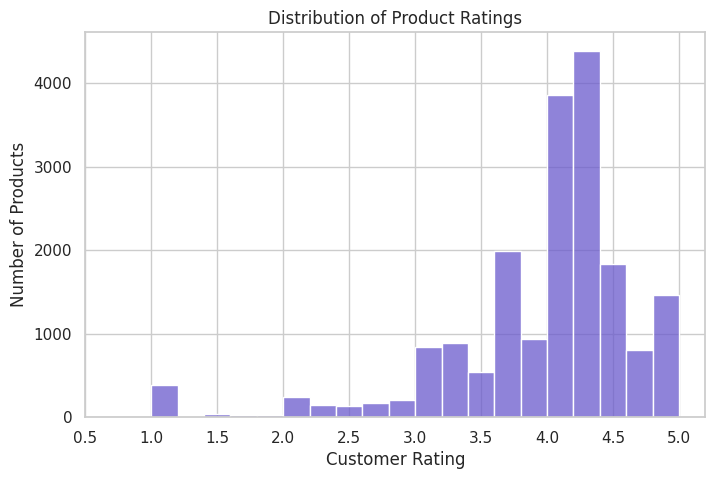

In [25]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(bb_df['rating'], bins=20, kde=False, color='slateblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Customer Rating")
plt.ylabel("Number of Products")
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

**💬 What this code does:**

- Visualizes the spread of product ratings across the dataset using a histogram.

- Helps us see how frequently each rating score appears.

**📊 Observations:**

- Ratings are mostly concentrated between 3.5 and 5, with 4.1 being the median (from earlier stats).

- Very few products have ratings below 3.

- A large chunk of entries are clustered at high ratings (4.0–4.5), which is common in customer-reviewed marketplaces due to bias toward higher ratings or filtering.

- Missing values exist (about 8.6k+ entries with no ratings, as seen earlier), likely because:

  - New or unpopular products haven’t received reviews yet.

  - Some SKUs aren’t rated on BigBasket’s site.

**🧠 What this means for us:**

We’ll need to handle missing ratings thoughtfully in analysis — either:

- Exclude them when studying product satisfaction,

- Or impute/flag them separately to study their impact.

In [26]:
# Grouping ratings
bb_df['rating'].value_counts().sort_index()

,count
rating,
1.0,387
1.2,2
1.3,9
1.4,6
1.5,32
1.6,3
1.7,22
1.8,22
1.9,4


#### **🧾 4.4 Analyzing type Column**

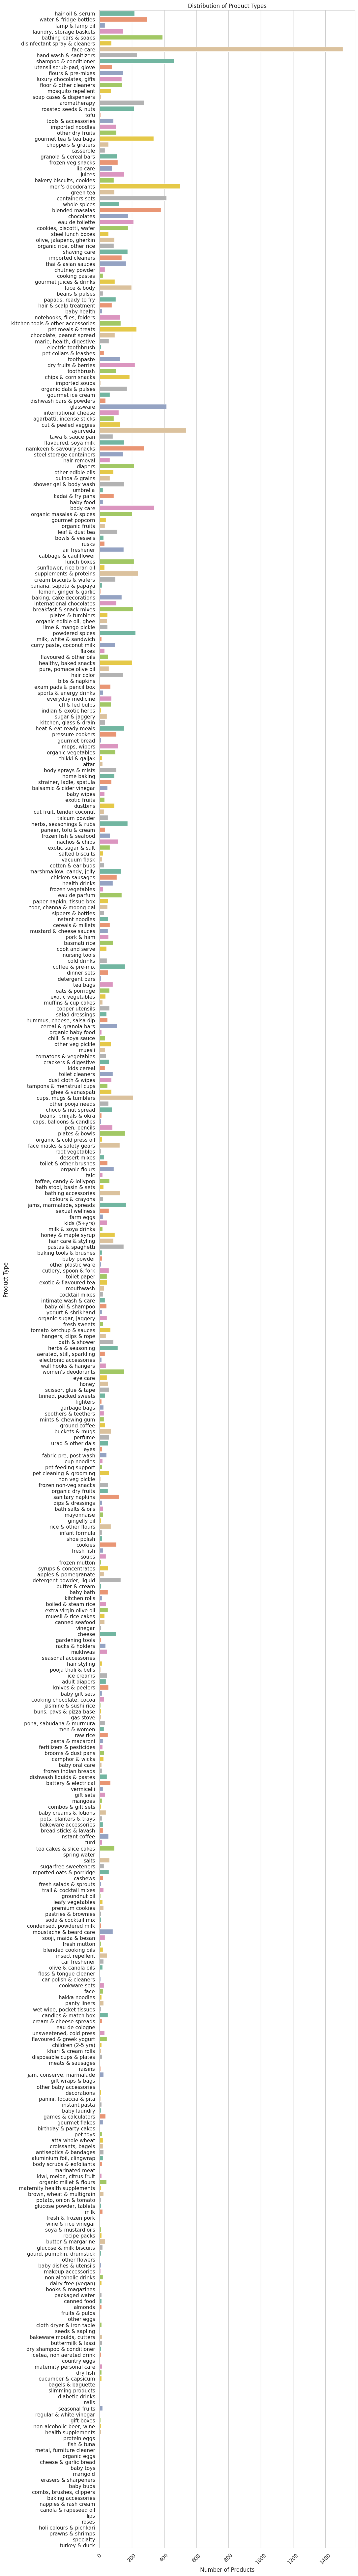

In [27]:
# Count of product types
plt.figure(figsize=(10, 100))
sns.countplot(data=bb_df, y='type', palette='Set2')
plt.title("Distribution of Product Types")
plt.xlabel("Number of Products")
plt.ylabel("Product Type")
plt.xticks(rotation=45)
plt.show()

**📊 Observations:**

- The majority of products are marked as veg, which is expected in an Indian grocery setting.

- A small portion is non-veg, likely meat, fish, etc.

- eggs are listed separately — possibly because they are often treated as a category on their own in India.

- There might also be some other rare or mislabeled entries — we should double-check for inconsistencies like typos or blank types.

Let’s confirm this by checking all unique values:

In [28]:
# Unique product types and their counts
bb_df['type'].value_counts(dropna=False)

,count
type,
face care,1508
ayurveda,538
men's deodorants,500
shampoo & conditioner,461
glassware,415
...,...
bagels & baguette,1
roses,1
prawns & shrimps,1


#### **🧾 4.5 Analyzing brand Column**

In [29]:
# Number of unique brands
num_brands = bb_df['brand'].nunique()
print(f"🔢 Total Unique Brands: {num_brands}")

🔢 Total Unique Brands: 2312


This tells us how many distinct brands are present in the dataset — a good KPI to measure brand diversity.

**📊 Top Brands by Product Count**

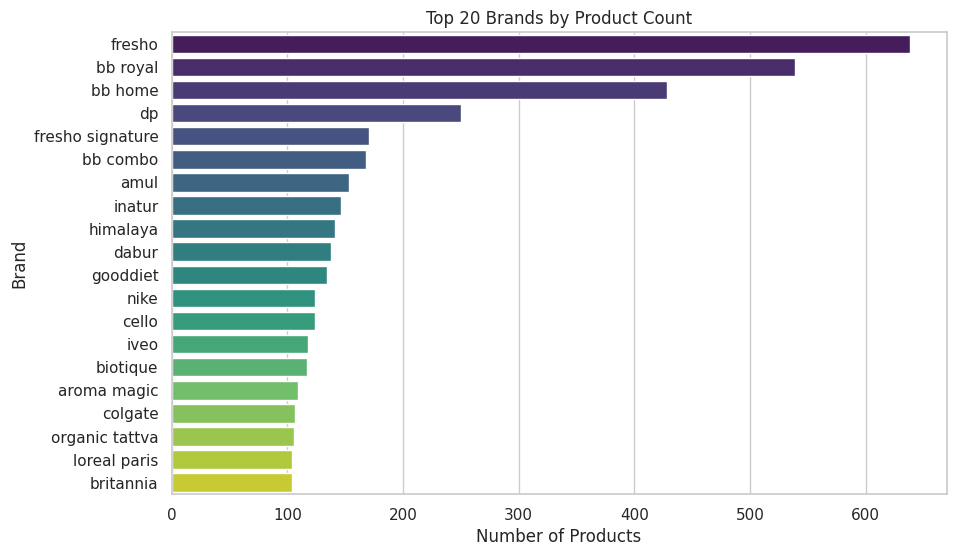

In [30]:
# Top 20 brands by number of products
top_brands = bb_df['brand'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 20 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

**💬 What this code does:**

- Displays the top 20 brands with the most number of listed products.

- Horizontal bar plot is easier to read for long brand names.

**🧠 Key Insights:**

- You’ll likely see BigBasket’s private label brands (like BB Royal, BB Popular) dominating the top.

- Some national brands (e.g., Aashirvaad, Amul, Haldiram's) may also appear.

- This helps identify brand monopolies or oversaturation, which links to our business objective on brand positioning.

**🔍 Additional Check: Missing or Inconsistent Brand Names**

In [31]:
# Count of missing or null brand values
bb_df['brand'].isnull().sum()

np.int64(0)

#### **🧾 4.6 Analyzing category and sub_category Columns**

These two together define the product hierarchy, and they’re foundational for nearly all business objectives, especially:

- 🛒 Product Assortment Optimization

- 💰 Pricing Strategy

- 📦 Opportunity and Gap Identification

**🔢 Number of Unique Categories and Subcategories**

In [32]:
# Unique categories and subcategories
num_categories = bb_df['category'].nunique()
num_subcategories = bb_df['sub_category'].nunique()

print(f"🧺 Unique Categories: {num_categories}")
print(f"🔖 Unique Subcategories: {num_subcategories}")

🧺 Unique Categories: 11
🔖 Unique Subcategories: 90


These are important KPIs to understand how broadly and deeply BigBasket organizes its products.

**📊 Product Count per Category**

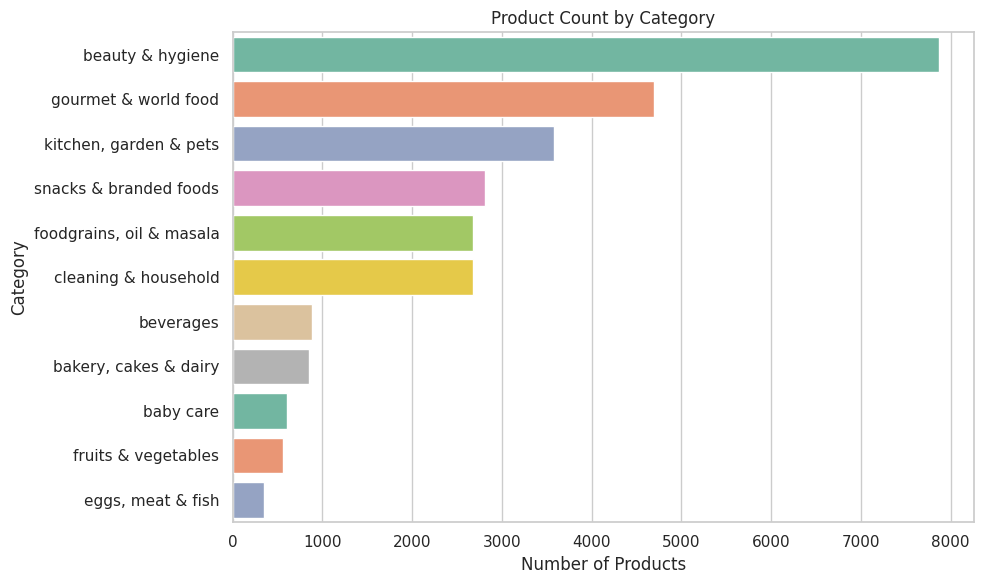

In [33]:
# Product distribution across categories
category_counts = bb_df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='Set2')
plt.title("Product Count by Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**📊 Product Count per Subcategory**

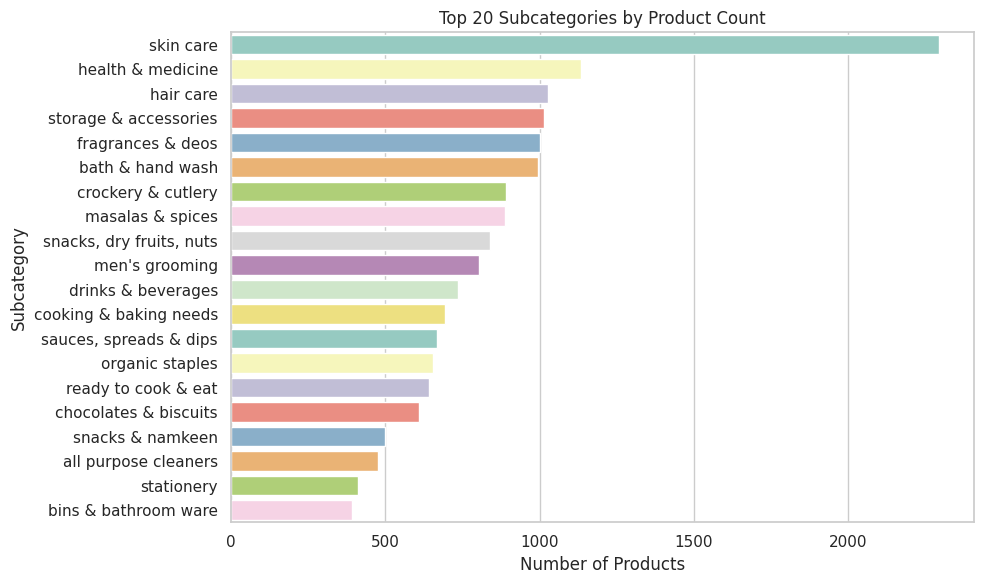

In [34]:
# Top 20 subcategories by product count
subcategory_counts = bb_df['sub_category'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_counts.values, y=subcategory_counts.index, palette='Set3')
plt.title("Top 20 Subcategories by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()

**💬 What this analysis shows:**

- Which categories dominate the platform — useful for evaluating if assortment is skewed.

- Which subcategories are over- or under-represented — e.g., maybe "Masalas" has 800+ SKUs while "Ready Mixes" has <50.

- This will help later when we flag low-assortment or overly saturated areas.

**🧠 Quick Additional Checks**

In [35]:
# Are there any missing values in category or sub_category?
bb_df[['category', 'sub_category']].isnull().sum()

,0
category,0
sub_category,0


#### **🧾 4.7 Category & Subcategory Mapping**

**📌 Why this step matters:**

- Helps us understand the structure and depth of each category.

- Highlights categories with few subcategories (may lack product variety).

- Flags categories that might be too fragmented or over-specified.

**📊 Number of Subcategories per Category**

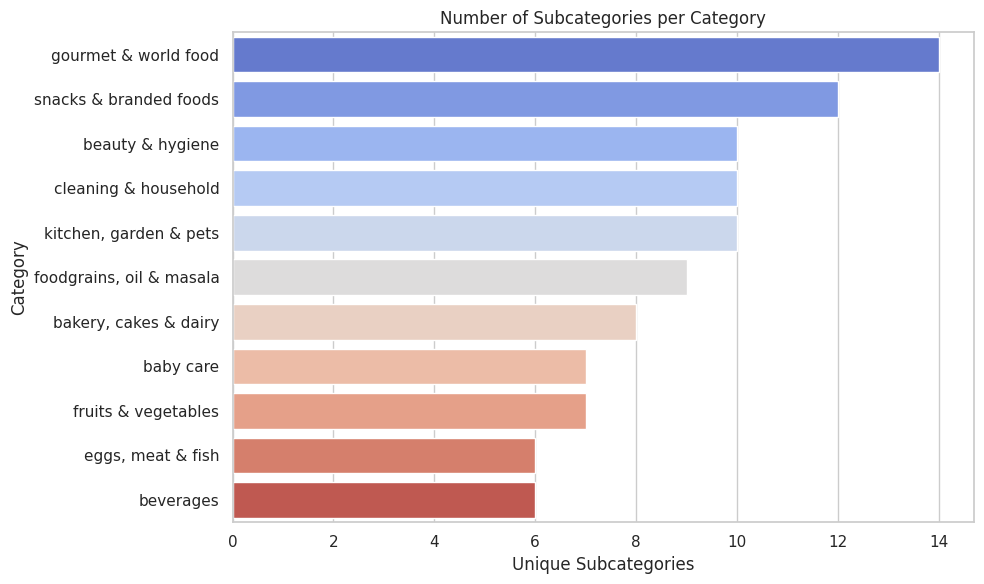

In [36]:
# Count of subcategories per category
subcats_per_cat = bb_df.groupby('category')['sub_category'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=subcats_per_cat.values, y=subcats_per_cat.index, palette="coolwarm")
plt.title("Number of Subcategories per Category")
plt.xlabel("Unique Subcategories")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

This tells us how broad or narrow each category’s structure is. A wide spread could suggest richness or possible clutter.

**📋 Top Subcategories per Category**

Let’s print a simple table that shows each category with its top 3 most frequent subcategories by product count.

In [37]:
# Top 3 subcategories by product count in each category
top_subs_per_cat = (
    bb_df.groupby(['category', 'sub_category'])
    .size()
    .reset_index(name='count')
    .sort_values(['category', 'count'], ascending=[True, False])
    .groupby('category')
    .head(3)
)

top_subs_per_cat

,category,sub_category,count
4,baby care,diapers & wipes,247
2,baby care,baby bath & hygiene,206
5,baby care,feeding & nursing,48
11,"bakery, cakes & dairy",dairy,385
10,"bakery, cakes & dairy","cookies, rusk & khari",153
9,"bakery, cakes & dairy",cakes & pastries,125
24,beauty & hygiene,skin care,2294
19,beauty & hygiene,health & medicine,1133
18,beauty & hygiene,hair care,1028
29,beverages,tea,334


🔍 This gives us clarity on which subcategories are core drivers within each category.

**💡 Key Insights to Look Out For:**

- ✅ Categories with a healthy spread of subcategories (balanced assortment).

- ⚠️ Categories dominated by just one or two subcategories (may risk overconcentration).

- ❗ Categories with very few or just one subcategory (possible opportunity to expand product types).

---

### **📘 Step 5: Bivariate & Multivariate Analysis**

**📌 Why this step matters:**

Now that we’ve understood individual columns (univariate analysis), it's time to explore relationships between features to uncover patterns such as:

- How pricing varies across categories and brands

- Whether higher-rated products are more expensive

- Which brands dominate certain categories

- And how product type (e.g., veg/non-veg) affects pricing or category distribution

#### **🧪 5.1 Relationship: Category vs Sale Price**

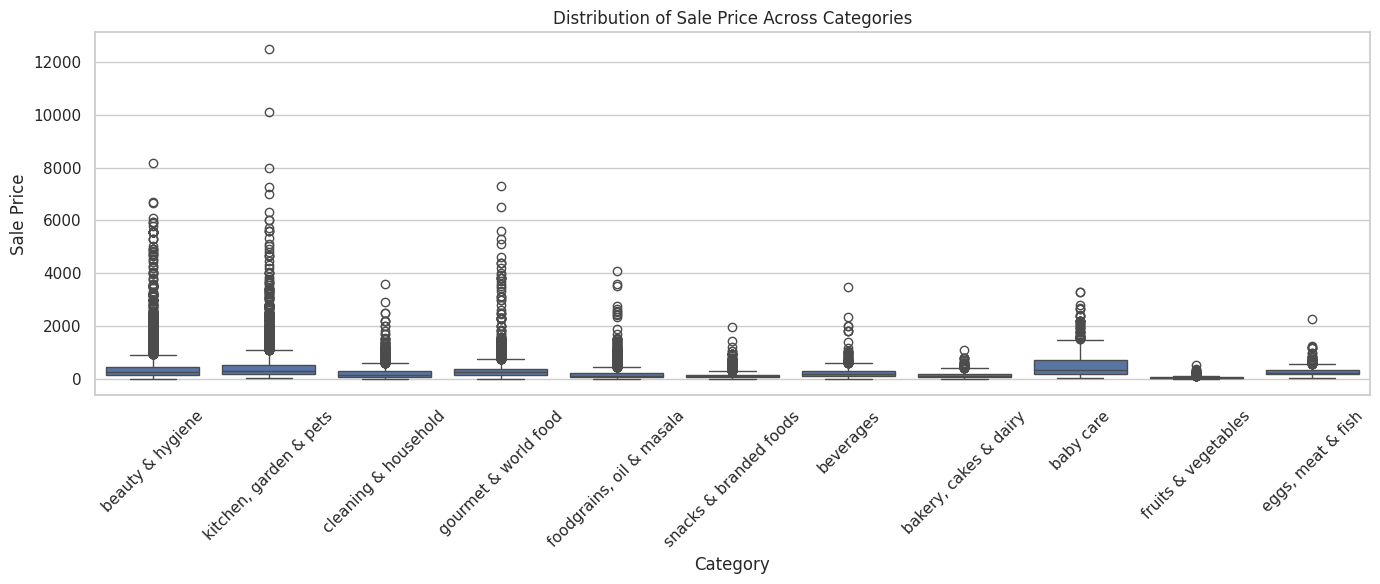

In [38]:
# plotting the relationship between category and sale price
plt.figure(figsize=(14, 6))
sns.boxplot(data=bb_df, x='category', y='sale_price')
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price Across Categories')
plt.xlabel('Category')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

**💬 What this plot tells us:**

- 📈 Which categories tend to be higher priced

- 🎯 Which ones have wide price variability (indicating tiered offerings)

- 🚨 Possible outliers (luxury or specialty items)

#### **🧪 5.2 Relationship: Brand vs Sale Price (Top Brands Only)**

**📌 Why this matters:**

Some brands may consistently price their products higher or lower than others. Comparing average sale prices of top brands can help us:

- Understand premium vs value brand positioning

- Detect pricing inconsistencies within subcategories

- Identify opportunities for competitive repricing or private-label launches

**🔧 Top 10 Brands by Product Count vs Average Sale Price**

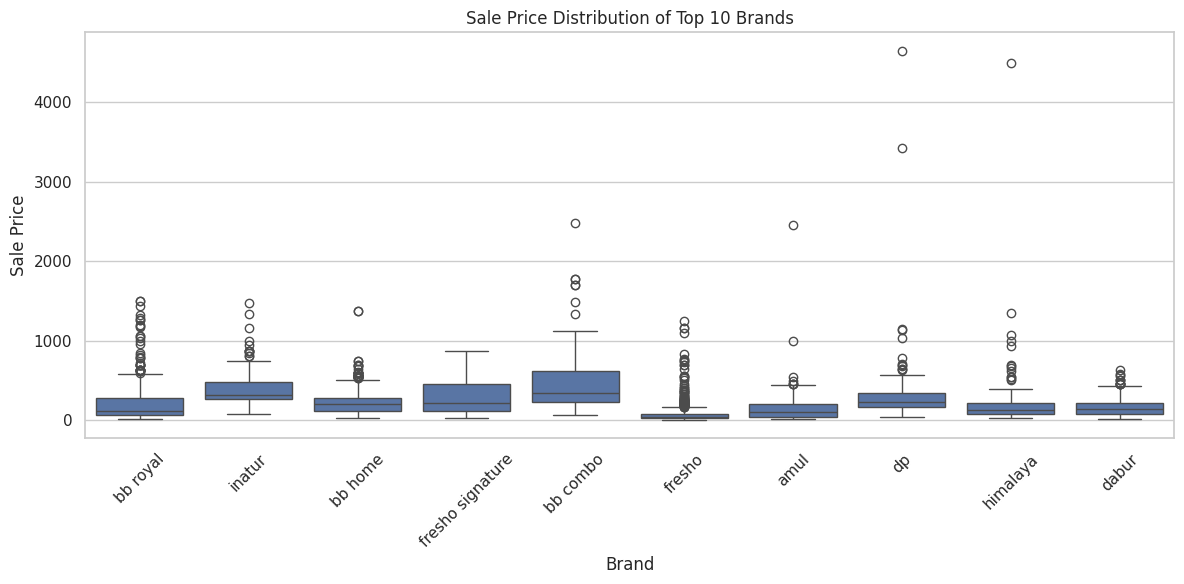

In [39]:
# Top 10 brands by frequency
top_brands = bb_df['brand'].value_counts().head(10).index

# Filter for top brands
top_brands_df = bb_df[bb_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands_df, x='brand', y='sale_price')
plt.title('Sale Price Distribution of Top 10 Brands')
plt.ylabel('Sale Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**💬 What this plot tells us:**

- 🧃 Some brands like “Tata” or “Amul” might offer products across multiple price points.

- 💎 Others may show narrow ranges, indicating a tight focus on certain price tiers.

- 🚩 Spot unusually high-priced items, suggesting possible luxury segments or pricing errors.

#### **🧪 5.3 Relationship: Rating vs Sale Price**

**📌 Why this matters:**

Analyzing how product ratings correlate with pricing can help us uncover:

- Whether higher-priced products are perceived as better quality

- If low-rated products are overpriced

- The general price-to-value sentiment customers may have



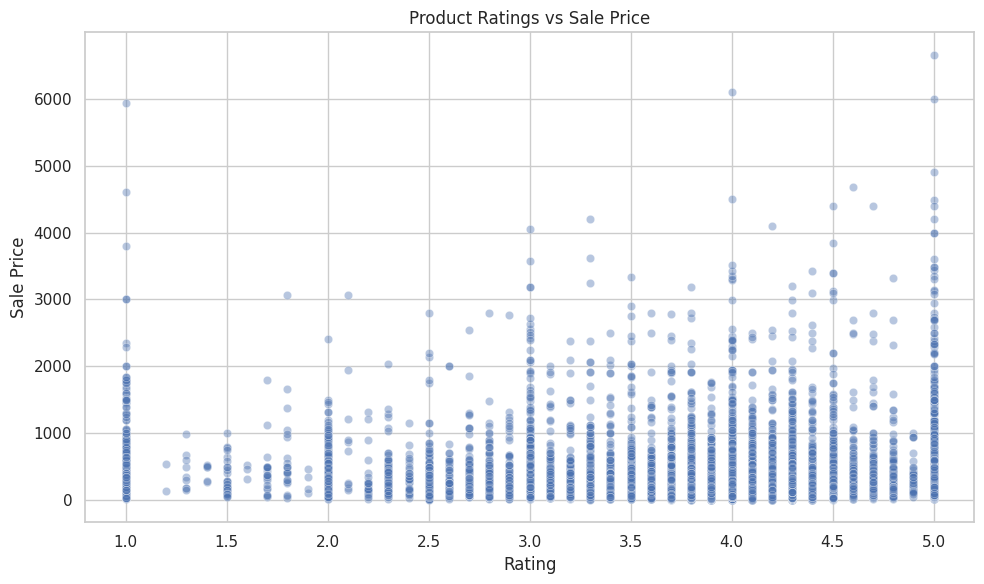

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bb_df, x='rating', y='sale_price', alpha=0.4)
plt.title('Product Ratings vs Sale Price')
plt.xlabel('Rating')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**💬 What this shows:**

- 🌈 A wide spread of sale prices across all rating levels suggests price is not strongly tied to customer satisfaction.

- 🔍 Most products cluster between 3.5 to 4.5 rating, with moderate sale prices.

- 💰 There are a few high-priced outliers, but they don’t always have the highest ratings — potentially overpriced or niche.

**🔧 Group Ratings into Bins**

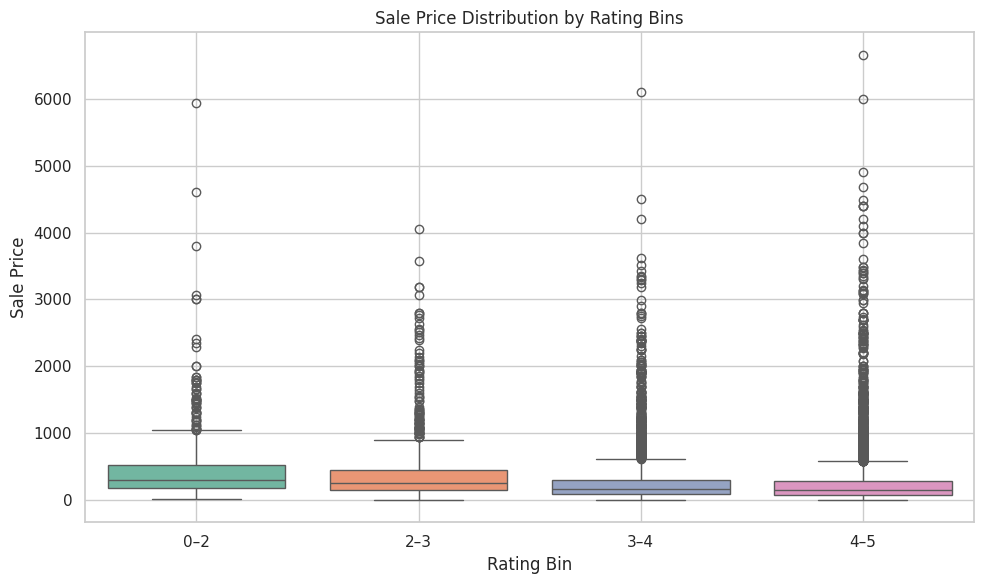

In [41]:
# Create rating bins (e.g., 1–2, 2–3, ..., 4–5)
bb_df['rating_bin'] = pd.cut(bb_df['rating'], bins=[0, 2, 3, 4, 5],
                          labels=['0–2', '2–3', '3–4', '4–5'])

# Boxplot to show price distribution per rating bin
plt.figure(figsize=(10, 6))
sns.boxplot(data=bb_df, x='rating_bin', y='sale_price', palette='Set2')
plt.title('Sale Price Distribution by Rating Bins')
plt.xlabel('Rating Bin')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **📊 5.4 Bivariate Analysis: sale_price vs type**

**💬 Why this matters:**

Product type might influence pricing strategy. Understanding if there's a significant price difference helps BigBasket:

- Position its offerings competitively

- Identify categories where pricing can be fine-tuned

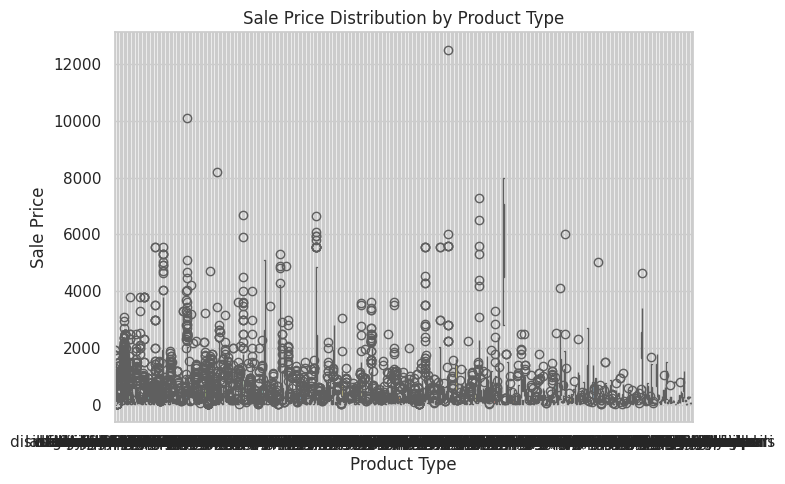

In [42]:
# Boxplot to visualize sale price distribution for each type
plt.figure(figsize=(8, 5))
sns.boxplot(data=bb_df, x='type', y='sale_price', palette='Set3')
plt.title('Sale Price Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

We’ll first inspect the unique values in the type column, clean or group them meaningfully (e.g., consolidate similar types), and re-plot for clarity.

In [43]:
# Check unique type values
bb_df['type'].value_counts()

,count
type,
face care,1508
ayurveda,538
men's deodorants,500
shampoo & conditioner,461
glassware,415
...,...
bagels & baguette,1
roses,1
prawns & shrimps,1


**Bucket Rare Types**

In [44]:
# Get counts of each type
type_counts = bb_df['type'].value_counts()

# Define a threshold
threshold = 200

# Create a new column that groups rare types as 'Other'
bb_df['type_grouped'] = bb_df['type'].apply(lambda x: x if type_counts[x] >= threshold else 'Other')

**Re-plot Boxplot**

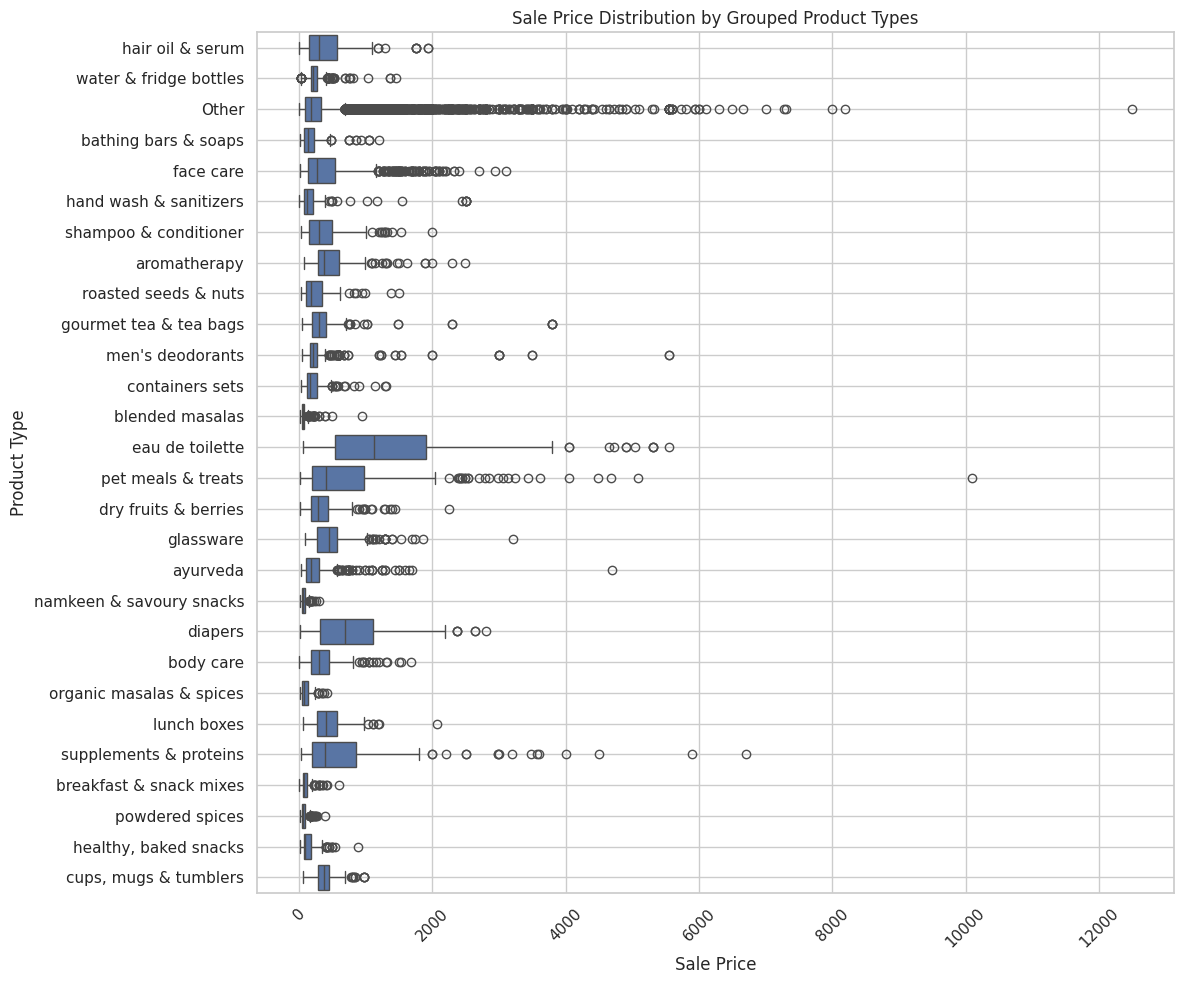

In [45]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=bb_df, y='type_grouped', x='sale_price')
plt.xticks(rotation=45)
plt.title('Sale Price Distribution by Grouped Product Types')
plt.xlabel('Sale Price')
plt.ylabel('Product Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**🧾 What This Will Help Us See:**

- Which types have generally higher/lower prices

- Are certain product types outliers in pricing?

- More meaningful insights than using all ~1000+ original values

#### **📘 Step 5.5: Bivariate Analysis – brand vs sale_price**

**📌 Why this step matters:**

Analyzing how brands price their products helps us understand:

- Brand-level pricing strategies (premium vs budget positioning)

- If certain brands are outliers in pricing

- Whether pricing varies heavily within brands or between brands

**🧪 5.5.1: Brands with Most Products (Top 15)**

Before comparing prices, let’s focus on the top brands by product count to ensure relevance.

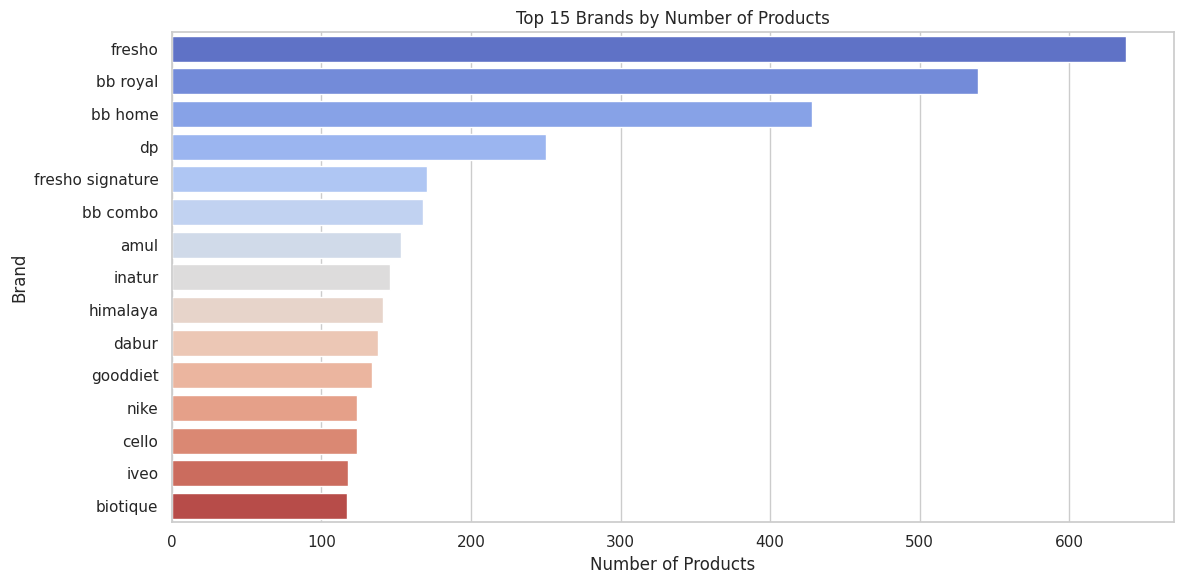

In [46]:
# Top 15 brands by product count
top_15_brands = bb_df['brand'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_brands.values, y=top_15_brands.index, palette='coolwarm')
plt.title("Top 15 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

**🧠 Insights:**

- This shows us which brands dominate the product listing.

- Helps focus our analysis on popular and high-assortment brands.

**📊 5.5.2: Boxplot of Sale Price by Top Brands**

Let’s now see how prices are distributed within each of these top brands.

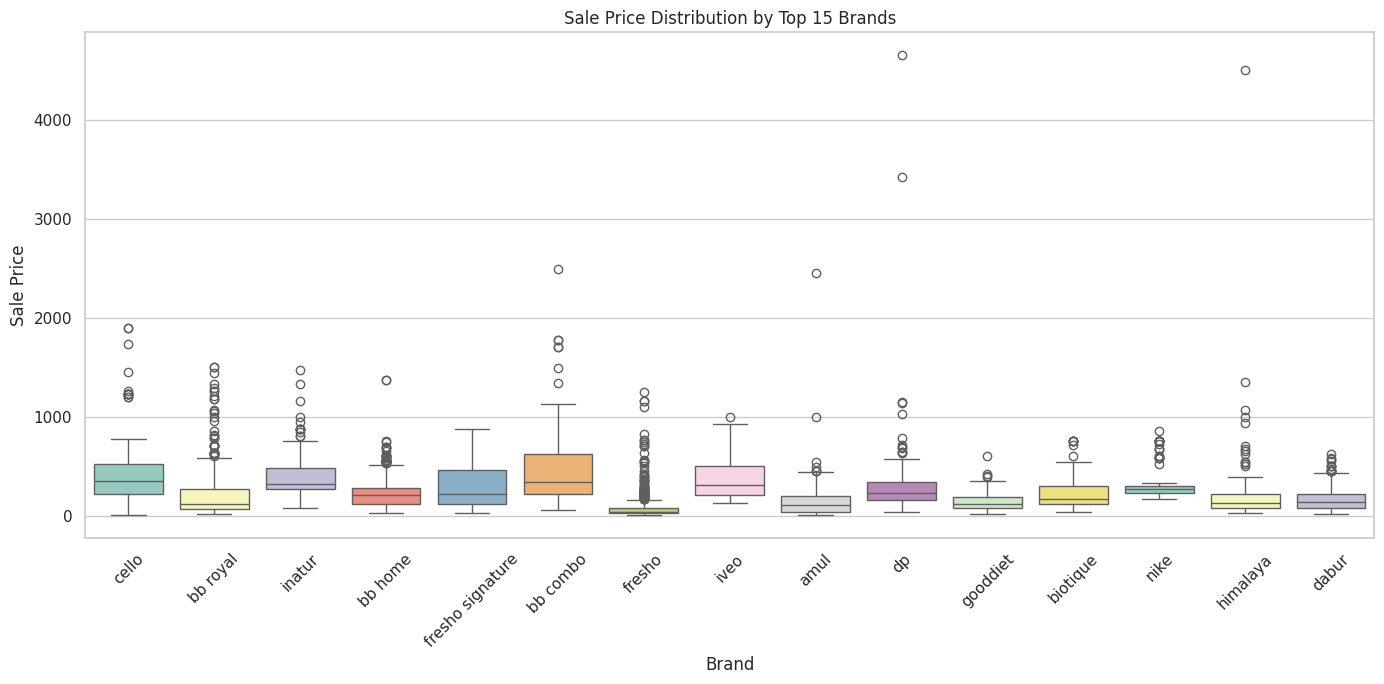

In [47]:
# Filter data to include only top 15 brands
df_top_brands = bb_df[bb_df['brand'].isin(top_15_brands.index)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_brands, x='brand', y='sale_price', palette='Set3')
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by Top 15 Brands")
plt.xlabel("Brand")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

**🔍 What this shows:**

- Median price positioning for each brand

- Range of product pricing within brands (pricing consistency)

- Outliers or luxury pricing strategies

#### **📘 Step 5.6: Bivariate Analysis – brand vs rating**

**📌 Why this step matters:**

Customer ratings are a proxy for product quality and customer satisfaction. Analyzing this by brand helps us:

- Identify highly rated brands

- Detect brands with inconsistent or low ratings

- Understand if premium brands justify their pricing with higher customer satisfaction

**🧪 5.6.1: Average Rating by Top Brands**

We’ll focus again on the top 15 brands by product count (same as earlier) to ensure sufficient data points for comparison.

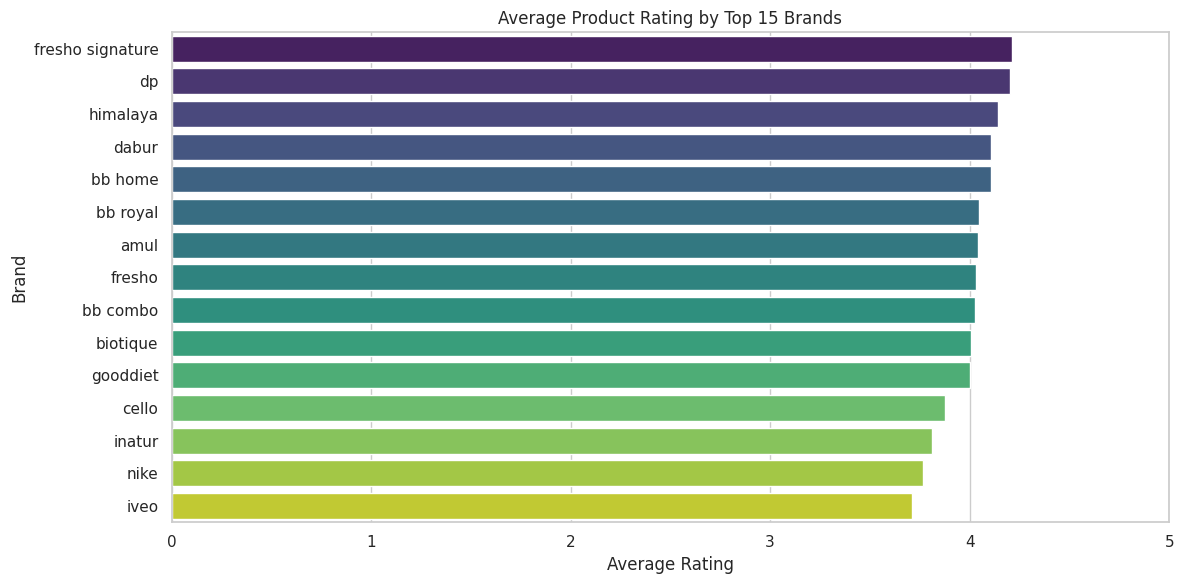

In [48]:
# Filter to top 15 brands again
df_top_brands_rating = bb_df[bb_df['brand'].isin(top_15_brands.index)]

# Drop missing ratings
df_top_brands_rating = df_top_brands_rating.dropna(subset=['rating'])

# Compute average rating by brand
avg_rating_by_brand = df_top_brands_rating.groupby('brand')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_brand.values, y=avg_rating_by_brand.index, palette='viridis')
plt.title("Average Product Rating by Top 15 Brands")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

**🧠 Insights:**

- Helps us rank brands based on perceived quality.

- Brands with high product count but low average ratings may need attention.

- Can inform private-label decisions or brand-partnership strategies.

#### **Step 5.7: Multivariate Analysis**

**📊 5.7.1: Rating vs Sale Price by Top Brands**

💬 Goal: Do higher-rated brands also charge higher prices? Is there a visible value-price correlation across major players?

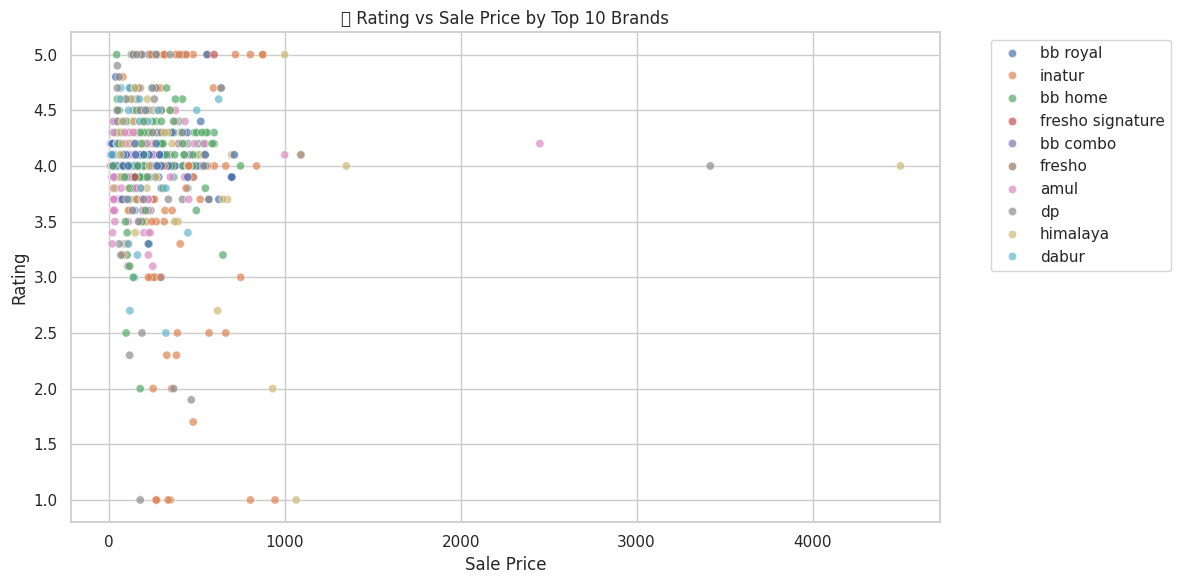

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 brands by count
top_brands = bb_df['brand'].value_counts().head(10).index

# Filter data for top brands
top_brand_df = bb_df[bb_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_brand_df, x='sale_price', y='rating', hue='brand', alpha=0.7)
plt.title('⭐ Rating vs Sale Price by Top 10 Brands')
plt.xlabel('Sale Price')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Interpretation:**

- Trend Detection: Check if brands with premium pricing are justified by customer satisfaction (rating).

- Brand Strategy Insight: Spot brands that offer great value (high rating, moderate price) — ideal for promotions or spotlighting.

- Outlier Watch: Flag brands with high prices and poor ratings — may signal poor value or positioning issues.

**📊 5.7.2: Sale Price vs Market Price vs Rating**

This will help us understand how much discount a product offers (market_price - sale_price) and whether that discount correlates with higher customer satisfaction (rating).

💬 What this plot does:

We’ll create a scatterplot where:

- X-axis: Sale Price

- Y-axis: Market Price

- Size or color: Represents Rating

This allows us to:

- Spot products with high discounts (large gap between market and sale price)

- See if products with higher discounts tend to have better or worse ratings

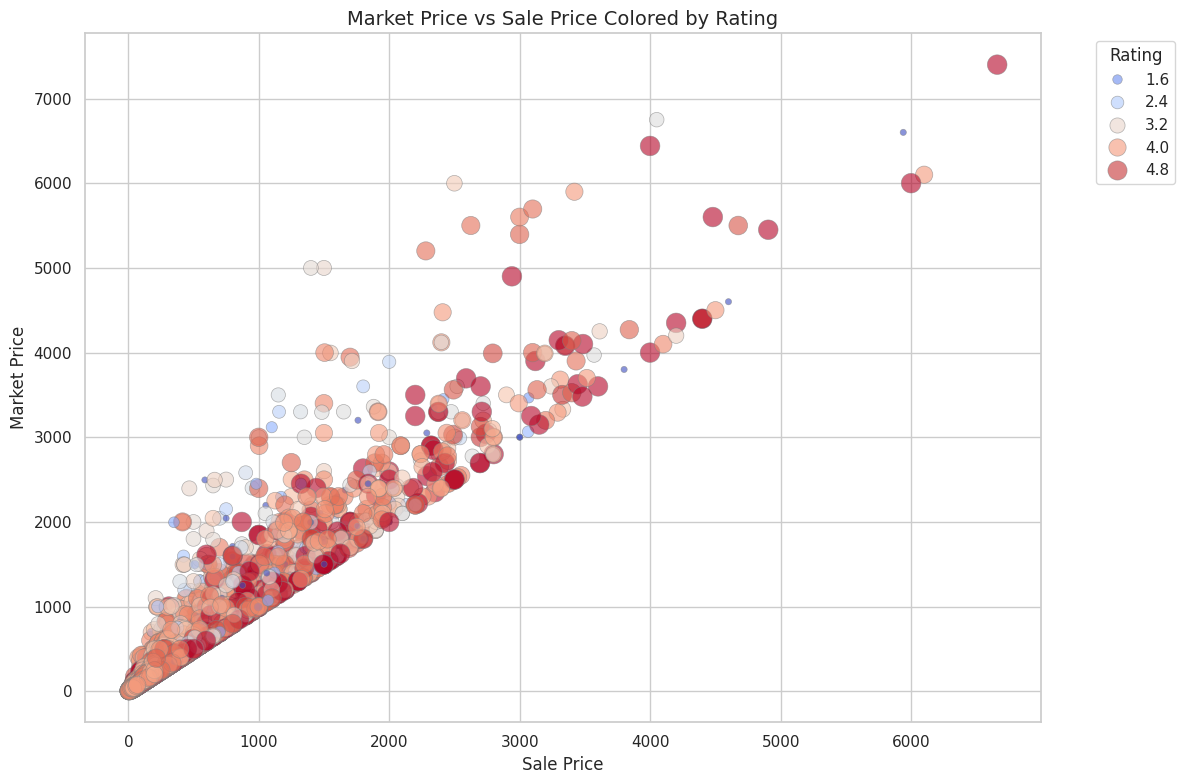

In [50]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=bb_df,
    x='sale_price',
    y='market_price',
    hue='rating',
    size='rating',
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.5
)

plt.title('Market Price vs Sale Price Colored by Rating', fontsize=14)
plt.xlabel('Sale Price')
plt.ylabel('Market Price')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Insights from the Visualization:**

💸 1. Majority of products lie near the diagonal (sale ≈ market)
This shows limited discounting on most items.

Brands might be trying to preserve margin.

🎯 2. Some clear discount zones (market price >> sale price)
A few products have a steep drop from market to sale price, indicating heavily discounted or promotional items.

These products could be great for flash sales or feature deals.

⭐ 3. High-Rated Products in Discounted Zones
Some products in the high discount region also have 4.0+ ratings.

These are great candidates for highlighting in promotions — price appeal + satisfaction.

⚠️ 4. Expensive items with low ratings exist
These may need further review (check product descriptions, reviews, etc.)

**📊 5.7.3: Category-Level Discount vs Rating Analysis**

💬 What this analysis does:

This lets us compare categories on:

- How much discount they offer on average

- How highly customers rate them

**Group by category and calculate mean values**

In [52]:
# Grouping by category
category_discount_rating = bb_df.groupby('category').agg({
    'discount_percent': 'mean',
    'rating': 'mean'
}).reset_index().dropna()

# Sorting for better readability in plots
category_discount_rating.sort_values(by='discount_percent', ascending=False, inplace=True)

**Plotting Discount % vs Rating**

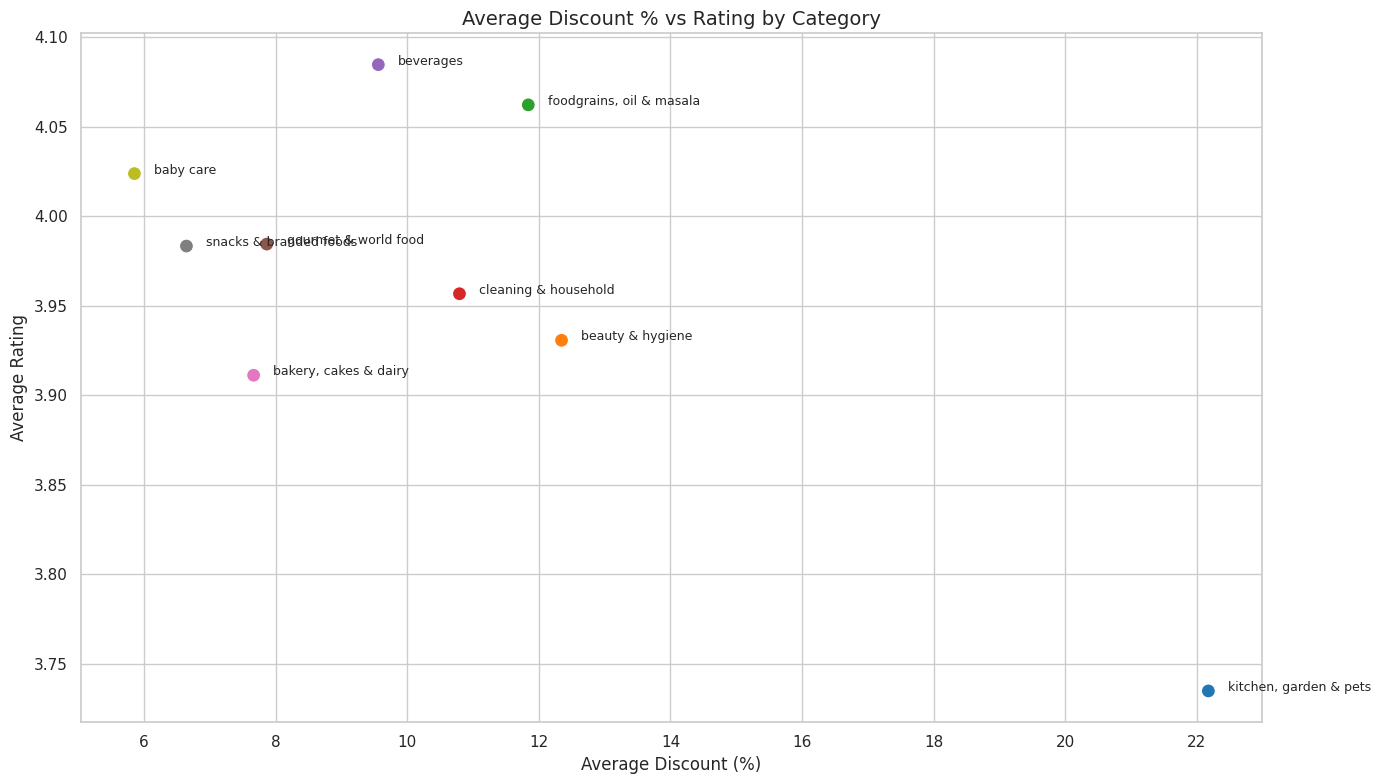

In [53]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=category_discount_rating,
    x='discount_percent',
    y='rating',
    hue='category',
    palette='tab10',
    s=100,
    legend=False
)

# Annotate points with category names
for i in range(category_discount_rating.shape[0]):
    plt.text(
        x=category_discount_rating['discount_percent'].iloc[i] + 0.3,
        y=category_discount_rating['rating'].iloc[i],
        s=category_discount_rating['category'].iloc[i],
        fontsize=9
    )

plt.title('Average Discount % vs Rating by Category', fontsize=14)
plt.xlabel('Average Discount (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

💰 Categories with high average discount:
- These might be actively promoted or overstocked.

- We can monitor sales performance here — are discounts helping ratings?

⭐ Categories with high rating but low discount:
- These could be premium categories where pricing power is stronger.

- A good target for bundling or exclusive private-label development.

⚖️ Balanced Categories (moderate discount, high ratings):
- Best of both worlds — value + satisfaction.

- Prioritize these for homepage visibility or seasonal campaigns.

🚨 Low-rated, high-discount categories:
- Might indicate quality issues or mispriced products.

- May warrant cleanup or supplier renegotiation.

---

## **🎯 Business Objective 1: Product Assortment Optimization**


**🧭 Goal:**

To help BigBasket optimize its product assortment by identifying:

- Which categories and subcategories have the most diverse offerings

- What areas are overcrowded or underrepresented

- Which types/brands dominate vs. have little presence

- Where to focus expansion or reduction in product lines

This is vital for:

- Improving inventory planning

- Enhancing customer experience

- Reducing product redundancy

- Identifying gap areas for future product development

#### **✅ Step 6.1: Product Count per Category**

💬 What we’re doing:

We’ll start by analyzing the number of products available in each main category. This gives a high-level view of assortment distribution across major product types.

**📌 Why this matters:**

- Helps us identify breadth vs. depth:

- Are we offering too much in some categories?

- Are there categories with few options worth expanding?

**Product Count per Category**

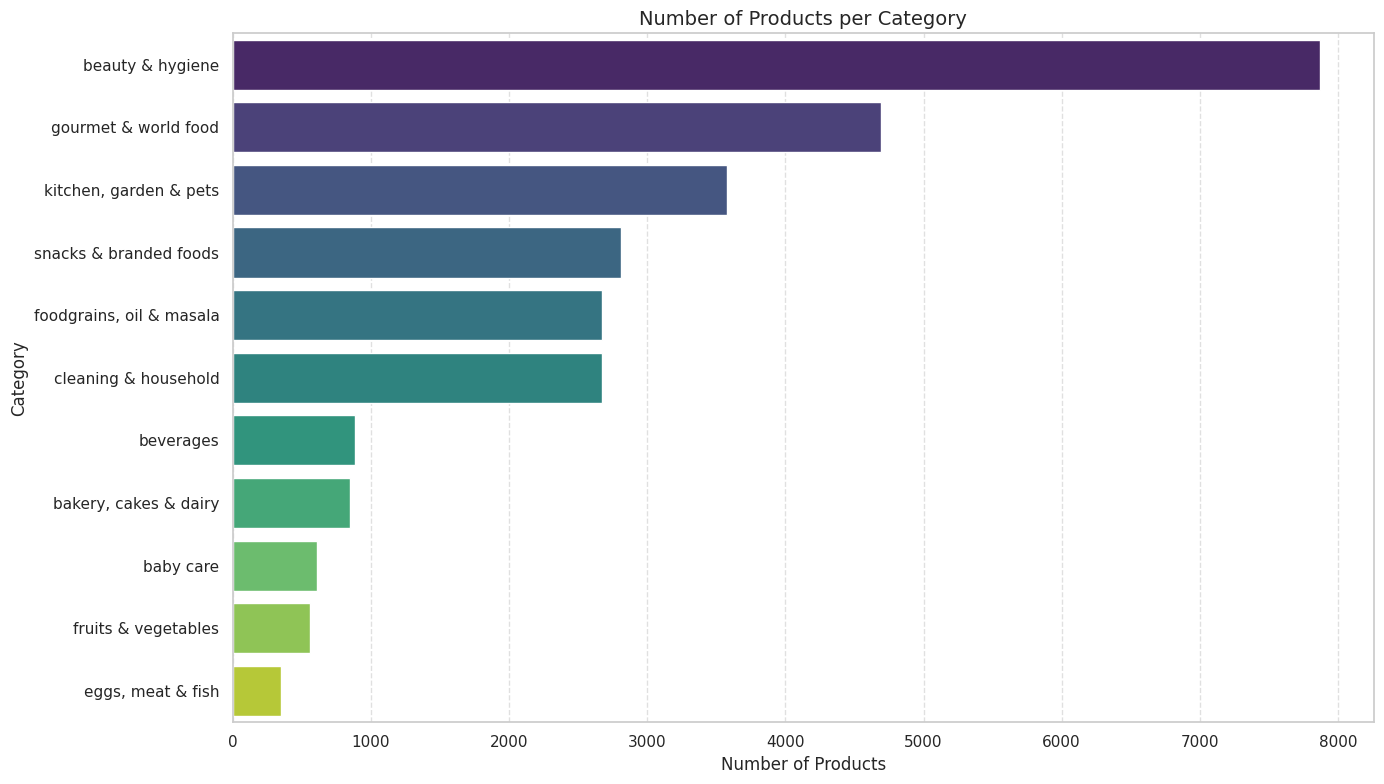

In [54]:
# Count the number of products in each category
category_counts = bb_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'product_count']

# Visualize the product distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=category_counts, x='product_count', y='category', palette='viridis')
plt.title('Number of Products per Category', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

- Some categories like Beauty and Hygiene, Gourmet and World Food, Kitchen, Garden & Pets dominate in assortment count.

- Smaller categories with very few products may indicate:

  - Niche offerings

  - New product verticals

  - Potential gaps in product variety

- Overcrowded categories might need rationalization or sub-category level analysis to prevent overlap.

#### **✅ Step 6.2: Product Count per Sub-Category**

💬 What we’re doing:

We’ll analyze the number of products within each subcategory to understand the depth of assortment inside broader categories.

**📌 Why this matters:**

- Even if a category seems balanced, some subcategories may be overloaded, while others are underrepresented.

- Helps spot:

  - Niche subcategories with few options (possible opportunity areas)

  - Highly saturated subcategories with product duplication risks

**Product Count per Subcategory**

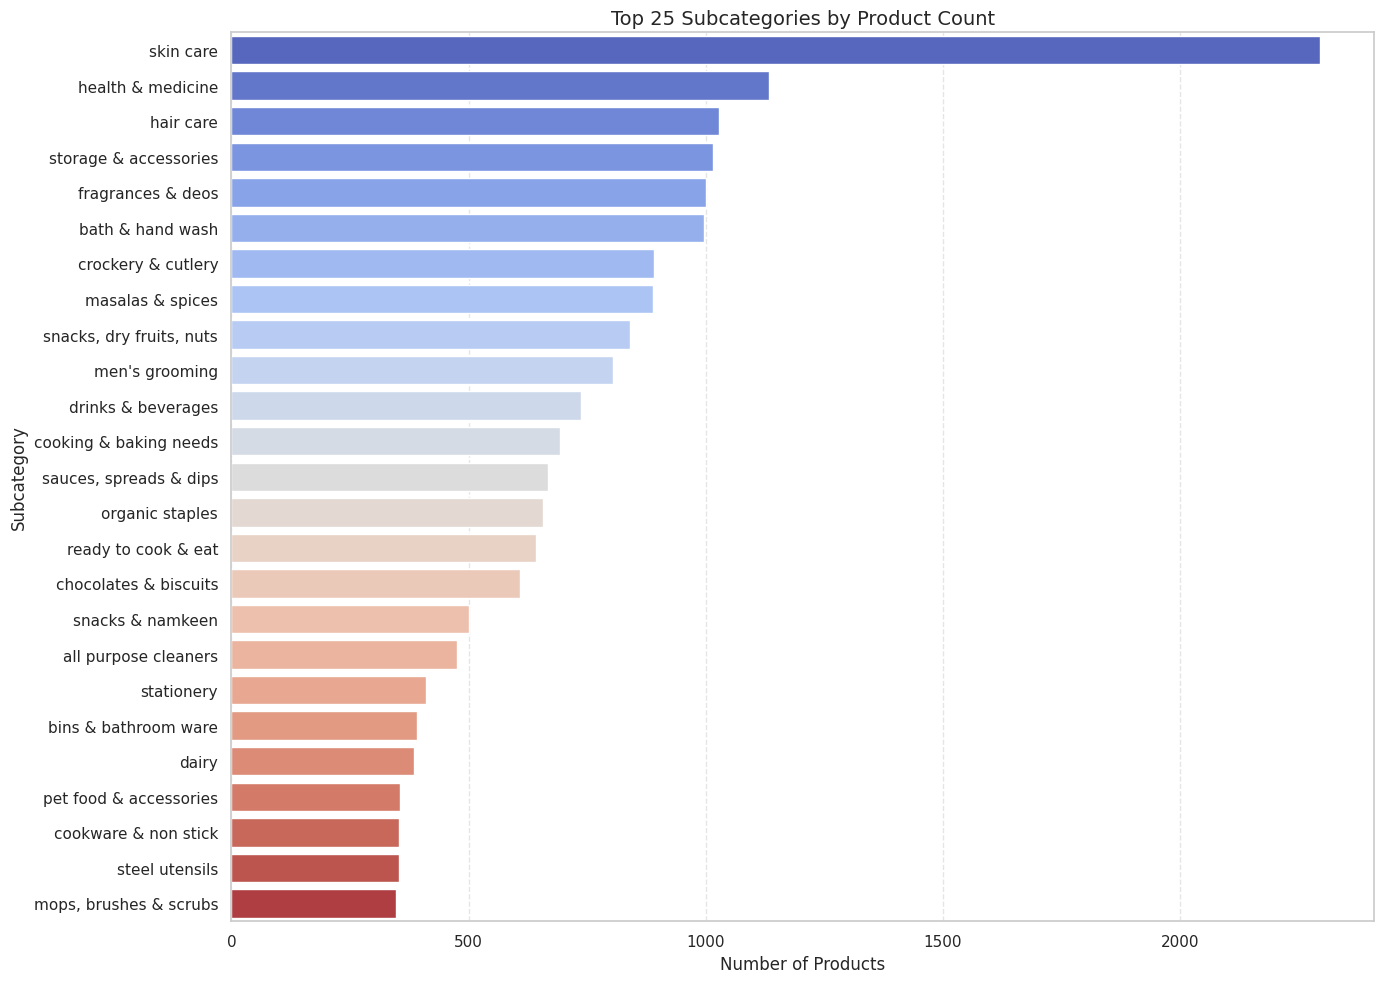

In [55]:
# Count the number of products in each subcategory
subcat_counts = bb_df['sub_category'].value_counts().reset_index()
subcat_counts.columns = ['sub_category', 'product_count']

# Display top 25 subcategories with most products
plt.figure(figsize=(14, 10))
sns.barplot(data=subcat_counts.head(25), y='sub_category', x='product_count', palette='coolwarm')
plt.title('Top 25 Subcategories by Product Count', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

- Subcategories such as skincare, health & medicine and hair care are among the top contributors in product count.

- This helps flag overcrowded spaces, where BigBasket might consider rationalizing SKUs.

- On the other hand, some subcategories might have just a handful of items, indicating potential for portfolio expansion or new vendor onboarding.

#### **✅ Step 6.3: Detecting Redundant or Duplicate Product Entries**

💬 What we’re doing:

We’re checking whether there are redundant product entries — these aren’t exact duplicates but could be highly similar products with slightly different names, possibly due to:

- Minor variations (like weight or flavor) not clearly distinguished

- Data inconsistencies (e.g., typos, case issues)

- Same product listed multiple times with small differences in descriptions

**📌 Why this matters:**

- Helps identify SKU bloat (too many similar listings)

- Reduces inventory complexity and customer overwhelm

- Allows us to propose consolidation or cleanup

**🧾 6.3.1: Find Products with Same Name, Brand, and Subcategory**

In [56]:
# Count combinations of product name + brand + subcategory
duplicate_like_products = bb_df.groupby(['product', 'brand', 'sub_category']).size().reset_index(name='count')

# Filter where count > 1, indicating likely redundancy
redundant_entries = duplicate_like_products[duplicate_like_products['count'] > 1]

# View a few examples
redundant_entries.head(10)

,product,brand,sub_category,count
37,100% green tea,sprig tea,tea,2
39,100% melamine 3d serving spoon - orange,iveo,crockery & cutlery,2
40,100% melamine 3d soup spoon - blue,iveo,crockery & cutlery,2
43,100% melamine dinner plate - blossom,iveo,crockery & cutlery,2
45,100% melamine dinner set - green,iveo,crockery & cutlery,2
70,100% melamine tea spoon set - black,iveo,crockery & cutlery,2
81,100% natural & pure coconut oil - unrefined,nature way,edible oils & ghee,2
82,"100% natural & pure gingelly oil - unrefined, ...",nature way,edible oils & ghee,2
83,"100% natural & pure groundnut oil - unrefined,...",nature way,edible oils & ghee,2
89,100% natural mosquito repellent patches,good knight,fresheners & repellents,2


**🔍 Key Observations:**

- This gives us an idea of products repeating across the same brand and subcategory — potential indicators of:

  - Different pack sizes/flavors (which should be clarified in product names)

  - Duplicate or near-identical listings

**🧾 6.3.2: Visualize Redundant Entries by Subcategory**

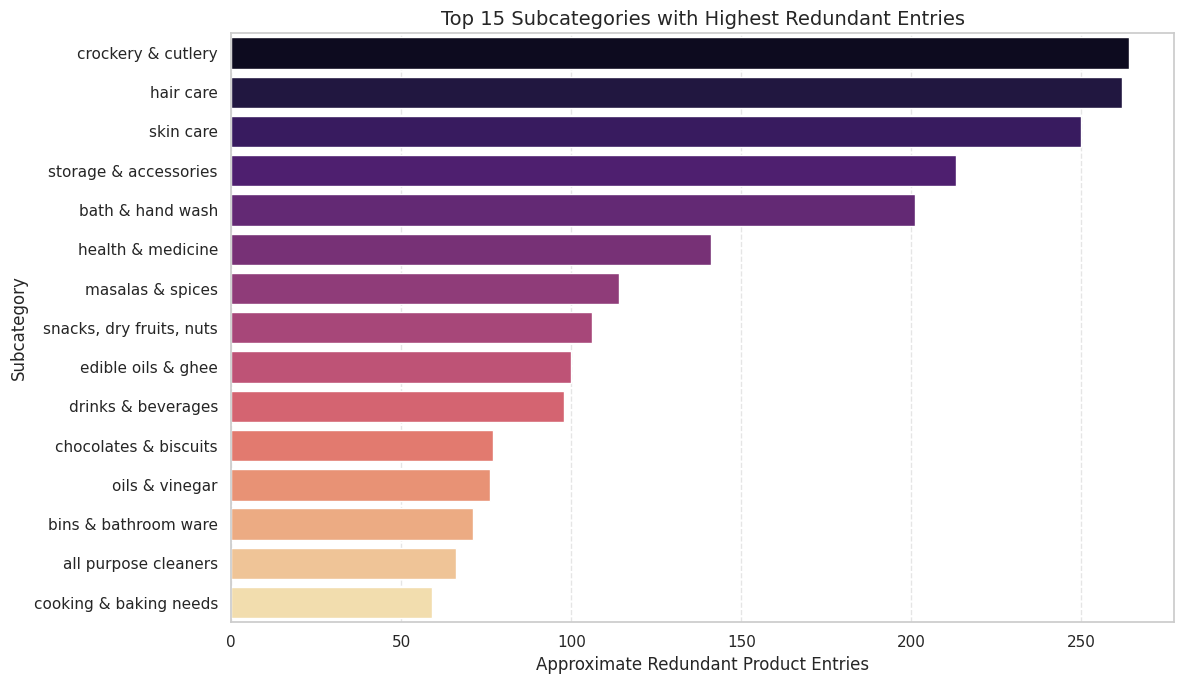

In [57]:
# Count redundant product entries by subcategory
redundant_summary = redundant_entries.groupby('sub_category')['count'].sum().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=redundant_summary.values, y=redundant_summary.index, palette='magma')
plt.title('Top 15 Subcategories with Highest Redundant Entries', fontsize=14)
plt.xlabel('Approximate Redundant Product Entries')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🧠 Key Insights:**

- Certain subcategories like crockery, hair care and skin care have multiple redundant entries, possibly differing only in packaging or flavors.

- These might benefit from product name standardization or SKU grouping.

- Could indicate data entry inconsistencies or overlisting by vendors.

#### **✅ Step 6.4: Identifying Low-Assortment Categories**

💬 What we’re doing:

We’re identifying categories or subcategories with a very limited number of products. These might signal:

- Missed opportunities in high-demand areas

- Gaps in assortment where customer needs may not be fully met

- Strategic areas to introduce new SKUs or brand partnerships

**📌 Why this matters:**

Low-assortment areas are ideal candidates for:

- Expanding product variety

- Launching private-label offerings

- Attracting new vendor partners

- Improving customer satisfaction through better choice diversity

**🧾 6.4.1: Find Subcategories with Few Products**

We’ll set a threshold (e.g., fewer than 10 products) to define a low-assortment subcategory.

In [58]:
# Set threshold for low-assortment definition
threshold = 10

# Count number of products per subcategory
subcategory_counts = bb_df['sub_category'].value_counts()

# Filter those with fewer than the threshold
low_assortment_subcats = subcategory_counts[subcategory_counts < threshold]

# Display results
low_assortment_subcats.sort_values(ascending=True)

,count
sub_category,
marinades,1
pork & other meats,5
"flower bouquets, bunches",8


**📈 6.4.2: Visualize the Low-Assortment Subcategories**

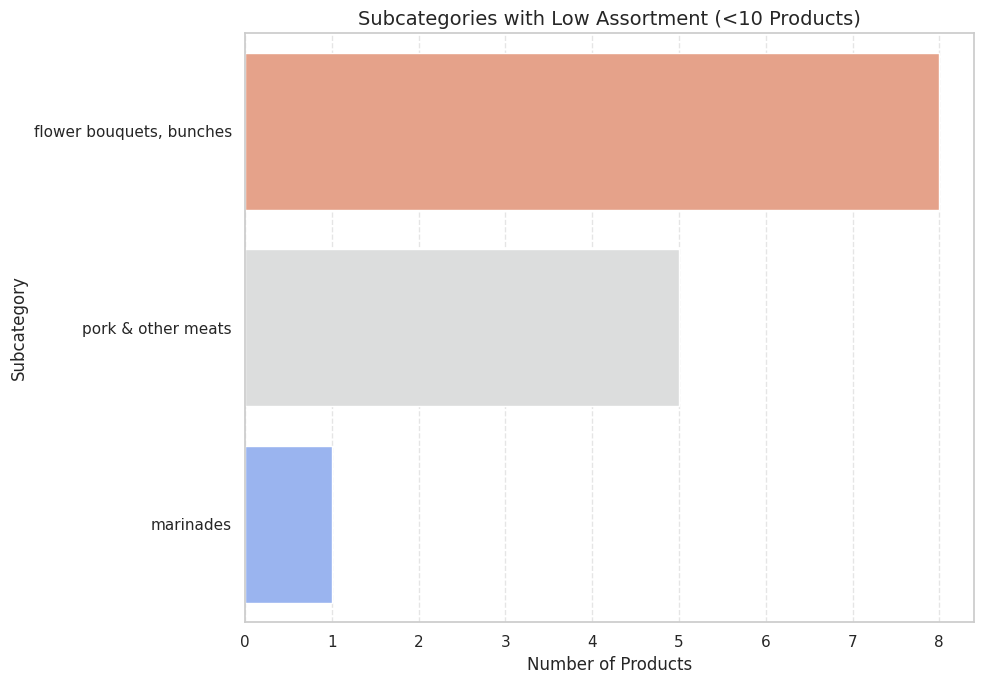

In [59]:
# Plot low-assortment subcategories
plt.figure(figsize=(10, 7))
sns.barplot(x=low_assortment_subcats.values, y=low_assortment_subcats.index, palette='coolwarm_r')
plt.title('Subcategories with Low Assortment (<10 Products)', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🧠 Key Insights:**

- Subcategories like roses, prawns & shrimps, bagels & baguette, or turkey & duck have fewer than 5 products.

- These could either be niche categories or underserved areas with room to expand.

- Cross-checking this with demand and pricing data (in later objectives) could help prioritize which gaps to address.